In [97]:
!pip install google-play-scraper

In [98]:
#import library
from google_play_scraper import Sort, reviews
from google_play_scraper import app
#import pandas yang digunakan untuk analisis dan manipulasi data
import pandas as pd
#import numpy yang digunakan untuk memproses array multidimensi
import numpy as np

In [99]:
#mulai scraping
result, continuation_token = reviews(
    'id.co.bankbkemobile.digitalbank',
    lang='id', # defaults is 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # sorting yang paling relevan
    count=1000, # jumlah dataset yang akan diambil
    filter_score_with=None # filter reviews
)

In [100]:
#membuat DataFrame dari hasil scraping
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,None,NaT,3.28.0
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,None,NaT,3.28.0
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,None,NaT,3.28.0
...,...,...,...,...,...,...,...,...,...,...,...
995,5c107490-b57f-44af-97d4-7e923eb2d991,Joni hendra Saputra (Putra),https://play-lh.googleusercontent.com/a/ACg8oc...,memakai seabank aman transaksi lebih mudah tid...,5,0,3.23.4,2025-07-30 04:21:23,"Hi Sobat SeaBank, kami memahami kegelisahan ka...",2025-07-31 23:50:09,3.23.4
996,738656f7-9b35-4aef-9362-14668058cc17,Wulan Syah,https://play-lh.googleusercontent.com/a/ACg8oc...,"penanganan kendala nya cepet dan mudah bgtttt,...",5,0,3.23.4,2025-07-29 18:51:13,None,NaT,3.23.4
997,9b07982d-fc57-470e-83c4-3383484fb2dd,rahmat leman,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasi aneh daftar seabank tapi kode verifik...,1,1,3.23.4,2025-07-29 18:36:01,"Hai Sobat SeaBank, mohon maaf atas ketidaknyam...",2025-07-29 19:10:55,3.23.4
998,9c211331-c809-4ecc-8beb-8398ad02e8f1,Epsilon Delta,https://play-lh.googleusercontent.com/a/ACg8oc...,Akhirnya seabank hadir dengan fitur transfer t...,5,7,3.19.0,2025-05-26 23:12:31,"Hai Sobat SeaBank, mohon maaf atas ketidaknyam...",2023-09-22 06:13:52,3.19.0


In [101]:
data['replyContent'].fillna('Tidak ada balasan', inplace=True)
data['repliedAt'].fillna('Tidak ada tanggal balasan', inplace=True)

/tmp/ipython-input-988326661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['replyContent'].fillna('Tidak ada balasan', inplace=True)
/tmp/ipython-input-988326661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

TEKS PREPROCESSING DENGAN NLTK

In [102]:
#case folding
data['casefold'] = data['content'].astype(str).str.lower()
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...


In [103]:
#Tokenisasi
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [104]:
#fungsi untuk melakukan tokenisasi
def tokenize_text(text):
  return word_tokenize(text)
#menambahkan kolom baru tokenize_ulasan
data['tokenize_ulasan'] = data['casefold'].apply(tokenize_text)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna..."
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in..."
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in..."


In [105]:
#menghapus tanda baca
import string
#fumgsi untuk menghapus tanda baca
def remove_punctuation(tokens):
  table = str.maketrans('','',string.punctuation)
  return [word.translate(table) for word in tokens]
#menambahkan kolom baru tanpa_tanda_baca
data['tanpa_tanda_baca']= data['tokenize_ulasan'].apply(remove_punctuation)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan,tanpa_tanda_baca
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna..."
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter...","[asli, simpel, juga, , programnya, dan, interl..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ...","[asli, oke, juga, , program, , internalnya, le..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in...","[asli, berguna, banget, , programnya, dan, int..."
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in...","[asli, praktis, sekali, , programnya, dan, int..."


In [106]:
!pip install emoji
import re
import emoji
def clean_text(text):
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Hapus emoji secara otomatis
    text = emoji.replace_emoji(text, replace='')  # hapus semua emoji

    # Hapus angka dan simbol
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['tokenisasi'] = data['tanpa_tanda_baca'].apply(lambda tokens: [clean_text(token) for token in tokens])
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan,tanpa_tanda_baca,tokenisasi
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna..."
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int..."
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int..."


In [107]:
#menghapus whitespace(karakter kosong)
#fungsi untuk membersihkan setiap token dari spasi dan tab di awal dan kahir
def clean_whitespace(tokens):
  return[token.strip() for token in tokens]
#menambahkan kolom baru white_space
data['white_space']= data['tokenisasi'].apply(clean_whitespace)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan,tanpa_tanda_baca,tokenisasi,white_space
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna..."
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int..."
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int..."


In [108]:
# Kamus normalisasi (kata typo, singkatan, gaul, dll)
normalisasi_dict = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'gak': 'tidak',
    'bgt': 'banget', 'bener': 'benar', 'trnyata': 'ternyata',
    'tdk': 'tidak', 'yg': 'yang', 'dlm': 'dalam', 'dr': 'dari',
    'sm': 'sama', 'aja': 'saja', 'udh': 'sudah', 'udah': 'sudah',
    'dgn': 'dengan', 'bisaaa': 'bisa', 'mantappp': 'mantap',
    'bgs': 'bagus', 'ok': 'oke', 'okee': 'oke', 'okey': 'oke',
    'trs': 'terus', 'krn': 'karena', 'blm': 'belum', 'pls': 'tolong',
    'smoga': 'semoga', 'makasih': 'terima kasih', 'makasi': 'terima kasih',
    'makasii': 'terima kasih', 'makasihh': 'terima kasih', 'thx': 'terima kasih',
    'tq': 'terima kasih', 'mantapp': 'mantap', 'mantul': 'mantap betul'
}

# Fungsi normalisasi lanjutan
def normalize_text(tokens):
    normalized_tokens = [normalisasi_dict.get(re.sub(r'(.)\1{2,}', r'\1', w), re.sub(r'(.)\1{2,}', r'\1', w)) for w in tokens]
    # Hapus kata yang panjangnya kurang dari 3 huruf
    filtered = [w for w in normalized_tokens if w is not None and len(w) > 3]
    return ' '.join(filtered)


# Terapkan ke hasil clean_text kamu
data['normalisasi'] = data['white_space'].apply(normalize_text)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan,tanpa_tanda_baca,tokenisasi,white_space,normalisasi
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...",asli berguna juga programnya internalnya lebih...
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl...",asli simpel juga programnya interlnya lebih te...
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le...",asli juga program internalnya lebih fleksibel ...
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int...",asli berguna banget programnya internalnya leb...
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int...",asli praktis sekali programnya internalnya leb...


In [111]:
# Import library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ambil semua kamus stopword bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopword tambahan (kata tidak relevan)
custom_stopwords = stop_words.union({
    'seabank', 'bank', 'tidak', 'login', 'yang', 'gabisa', 'saja',
    'udah', 'dengan', 'karena', 'bisa', 'sudah', 'kalo', 'kali'
})

# Fungsi hapus stopword
def remove_stopwords(tokens):
    return [word for word in tokens if word not in custom_stopwords]
# Tokenisasi terlebih dahulu dari kolom normalisasi
data['tokenized'] = data['normalisasi'].apply(lambda x: word_tokenize(x))

# Hapus stopword dari token hasil tokenisasi
data['review'] = data['tokenized'].apply(remove_stopwords)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,casefold,tokenize_ulasan,tanpa_tanda_baca,tokenisasi,white_space,normalisasi,review,tokenized
0,31418d00-cebe-4996-a279-9a5cfb2e9e61,isikode[ AYG5HH ] ada bonusnya,https://play-lh.googleusercontent.com/a-/ALV-U...,Asli berguna juga programnya dan internalnya l...,5,10,3.28.0,2025-10-14 15:31:39,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:28:28,3.28.0,asli berguna juga programnya dan internalnya l...,"[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...","[asli, berguna, juga, programnya, dan, interna...",asli berguna juga programnya internalnya lebih...,"[asli, berguna, programnya, internalnya, memad...","[asli, berguna, juga, programnya, internalnya,..."
1,868e54f7-05fb-4f9a-896c-0a8ab6cd95cd,pake kode[ 5X9GKC ] dpt bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli simpel juga, programnya dan interlnya leb...",5,8,3.28.0,2025-10-14 16:03:40,"Hi Sobat SeaBank, mohon maaf atas ketidaknyama...",2025-10-14 18:29:51,3.28.0,"asli simpel juga, programnya dan interlnya leb...","[asli, simpel, juga, ,, programnya, dan, inter...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl...","[asli, simpel, juga, , programnya, dan, interl...",asli simpel juga programnya interlnya lebih te...,"[asli, simpel, programnya, interlnya, tertata,...","[asli, simpel, juga, programnya, interlnya, le..."
2,0f632e94-c28f-46c9-aa54-15597e4b3f91,Gnkan kode[ 2ZQF6Y ] tuk bonus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Asli oke juga, program & internalnya lebih fle...",5,4,3.28.0,2025-10-15 16:54:22,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,"asli oke juga, program & internalnya lebih fle...","[asli, oke, juga, ,, program, &, internalnya, ...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le...","[asli, oke, juga, , program, , internalnya, le...",asli juga program internalnya lebih fleksibel ...,"[asli, program, internalnya, fleksibel, pakai,...","[asli, juga, program, internalnya, lebih, flek..."
3,77e863c8-9ac0-42de-8be2-489024a30451,Sangit Lown,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli berguna banget! programnya dan internalny...,5,1,3.28.0,2025-10-15 17:37:00,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli berguna banget! programnya dan internalny...,"[asli, berguna, banget, !, programnya, dan, in...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int...","[asli, berguna, banget, , programnya, dan, int...",asli berguna banget programnya internalnya leb...,"[asli, berguna, banget, programnya, internalny...","[asli, berguna, banget, programnya, internalny..."
4,017e2f67-8d00-4739-9373-b195bbdc2f86,Becek 555,https://play-lh.googleusercontent.com/a/ACg8oc...,Asli praktis sekali! Programnya dan internalny...,5,1,3.28.0,2025-10-15 22:39:31,Tidak ada balasan,Tidak ada tanggal balasan,3.28.0,asli praktis sekali! programnya dan internalny...,"[asli, praktis, sekali, !, programnya, dan, in...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int...","[asli, praktis, sekali, , programnya, dan, int...",asli praktis sekali programnya internalnya leb...,"[asli, praktis, programnya, internalnya, memad...","[asli, praktis, sekali, programnya, internalny..."


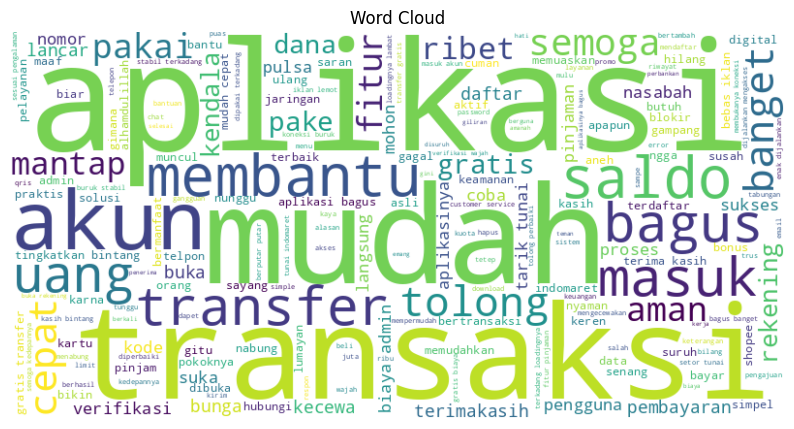

In [114]:
#visualisasi data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#menggabungkan semua konten menjadi satu teks
all_content = ' '.join([token for sublist in data['review'] for token in sublist])
#membuat objek wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_content)
#plot wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [115]:
#Distribusi Frekuensi Kata (FreqDist)=menghitung frekuensi kemunculan perkata
from nltk import FreqDist
#menggabungkan semua token dari kolom raw_split
all_tokens = [token for sublist in data['review']for token in sublist]
#menghitung frekuensi kata dari list gabungan
word_freq_total = FreqDist(all_tokens)
#menampilkan 20 kata teratas
word_freq_total.most_common(20)

[('aplikasi', 275),
 ('mudah', 216),
 ('transaksi', 190),
 ('bagus', 175),
 ('transfer', 154),
 ('banget', 132),
 ('akun', 125),
 ('cepat', 124),
 ('masuk', 122),
 ('uang', 121),
 ('membantu', 121),
 ('tolong', 118),
 ('saldo', 118),
 ('gratis', 116),
 ('fitur', 93),
 ('semoga', 89),
 ('aman', 79),
 ('biaya', 79),
 ('pakai', 73),
 ('kasih', 73)]

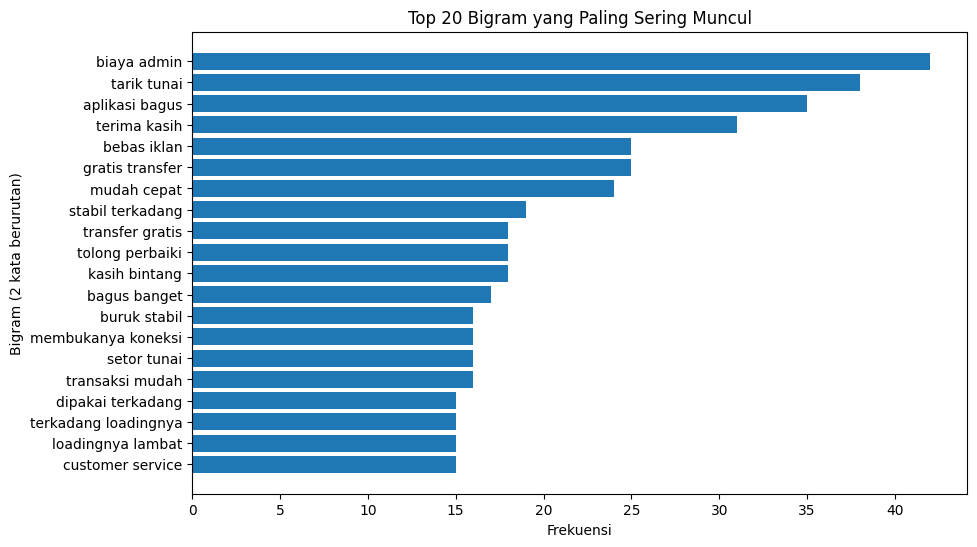

In [117]:
# =============================
# 1️⃣ Import Library Tambahan
# =============================
from nltk import bigrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# 2️⃣ Membuat Bigram dari Kolom 'review'
# =============================

# Menggabungkan semua token dari seluruh ulasan
all_tokens = [token for tokens in data['review'] for token in tokens]

# Membuat daftar bigram (dua kata berurutan)
bi_grams = list(bigrams(all_tokens))

# =============================
# 3️⃣ Hitung Frekuensi Bigram
# =============================
bigram_freq = Counter(bi_grams)

# Ambil 20 bigram paling sering muncul
top20_bigrams = bigram_freq.most_common(20)

# Konversi ke DataFrame agar mudah divisualisasikan
df_bigram = pd.DataFrame(top20_bigrams, columns=['Bigram', 'Frequency'])

# =============================
# 4️⃣ Visualisasi Bigram
# =============================
plt.figure(figsize=(10,6))
plt.barh([' '.join(b) for b in df_bigram['Bigram']], df_bigram['Frequency'])
plt.xlabel('Frekuensi')
plt.ylabel('Bigram (2 kata berurutan)')
plt.title('Top 20 Bigram yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Biar ranking tertinggi di atas
plt.show()


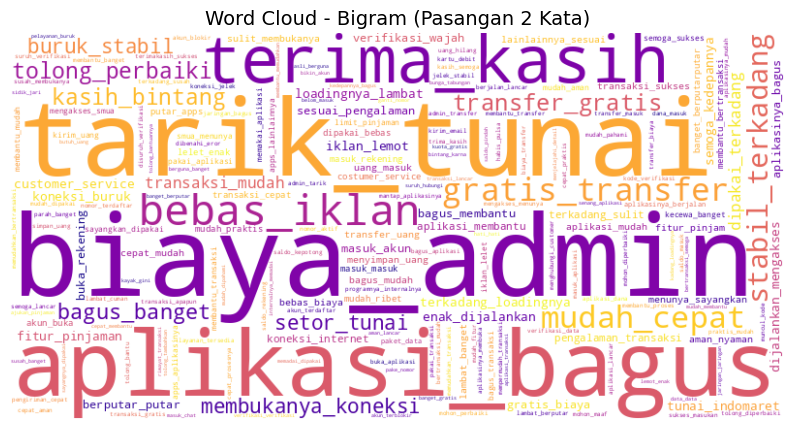

In [118]:
# =============================
# 5️⃣ Word Cloud untuk Bigram
# =============================
from wordcloud import WordCloud

# Gabungkan bigram menjadi satu string, misal: "mudah_digunakan top_up saldo_tidak"
bigram_words = ['_'.join(bigram) for bigram in bi_grams]

# Hitung frekuensi lagi
bigram_freq_dict = Counter(bigram_words)

# Buat Word Cloud
wordcloud_bigram = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(bigram_freq_dict)

# Tampilkan
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_bigram, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Bigram (Pasangan 2 Kata)', fontsize=14)
plt.show()


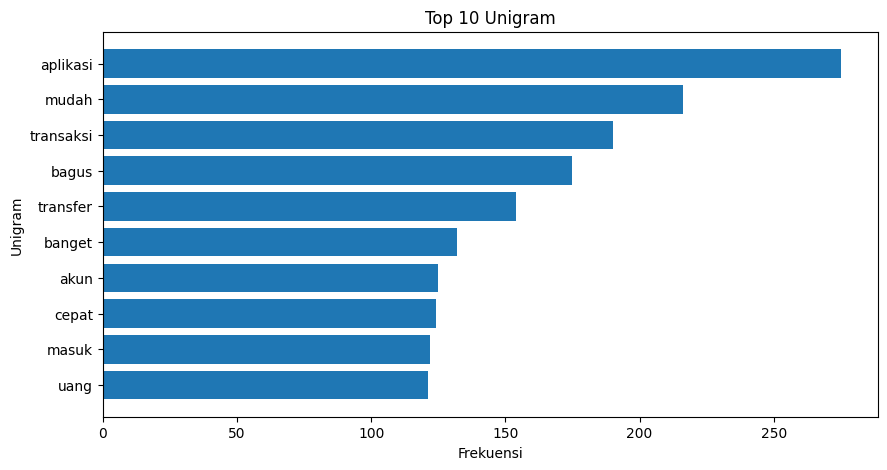

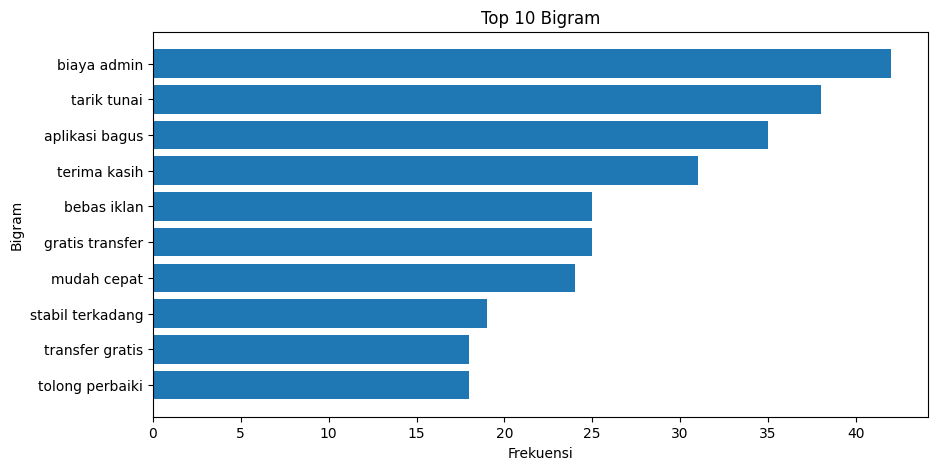

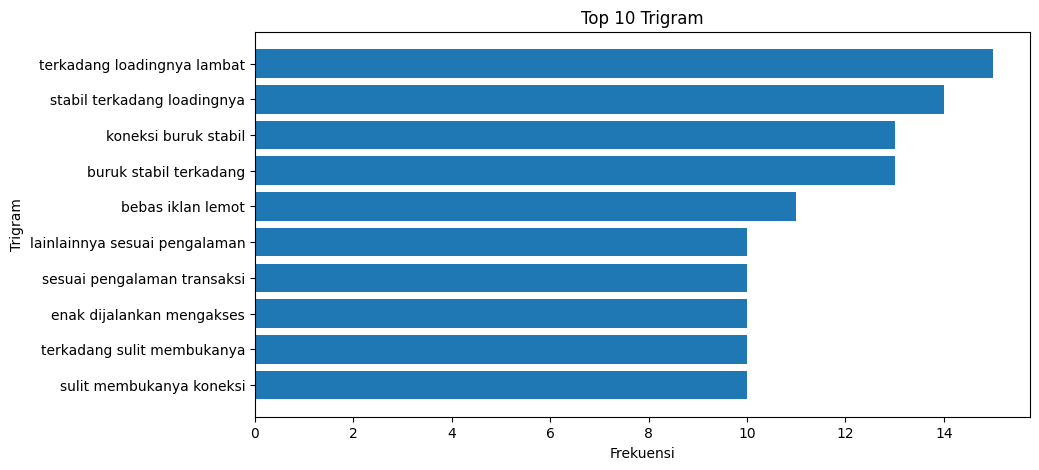

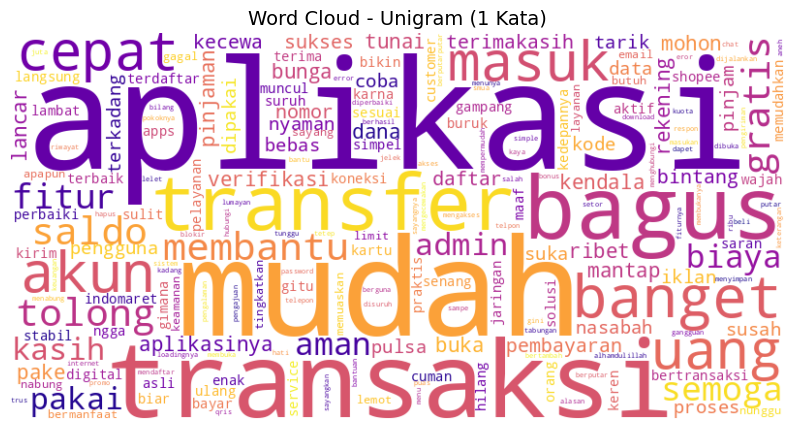

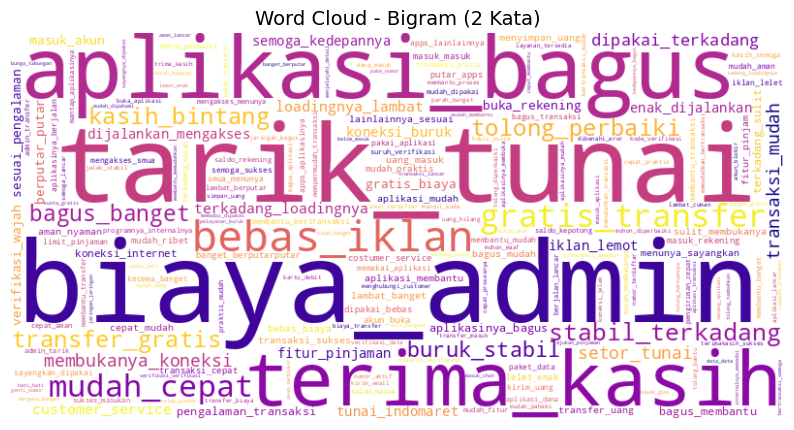

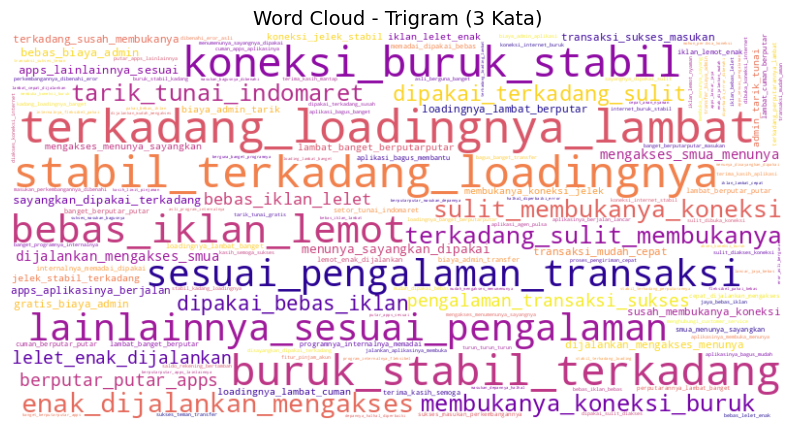

In [119]:
# ====================================
# 🔹 N-GRAM (1, 2, dan 3) + WordCloud
# ====================================

from nltk import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua kata setelah stopword removal
all_words = [word for tokens in data['review'] for word in tokens]

# -----------------------------
# 1️⃣ Unigram (1 kata)
# -----------------------------
unigrams = list(ngrams(all_words, 1))
unigram_freq = Counter(unigrams)

# -----------------------------
# 2️⃣ Bigram (2 kata)
# -----------------------------
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams)

# -----------------------------
# 3️⃣ Trigram (3 kata)
# -----------------------------
trigrams = list(ngrams(all_words, 3))
trigram_freq = Counter(trigrams)

# =========================================
# 🔸 Fungsi bantu untuk menampilkan hasil
# =========================================
def plot_top_ngrams(freq_dict, n, title):
    ngram_df = pd.DataFrame(freq_dict.most_common(10), columns=['ngram', 'count'])
    ngram_df['ngram'] = ngram_df['ngram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10,5))
    plt.barh(ngram_df['ngram'][::-1], ngram_df['count'][::-1])
    plt.title(f"Top 10 {title}")
    plt.xlabel("Frekuensi")
    plt.ylabel(f"{title}")
    plt.show()

# Tampilkan 10 kata/pasangan/kelompok teratas
plot_top_ngrams(unigram_freq, 1, "Unigram")
plot_top_ngrams(bigram_freq, 2, "Bigram")
plot_top_ngrams(trigram_freq, 3, "Trigram")

# =========================================
# 🔹 Word Cloud untuk N-Gram
# =========================================
def show_wordcloud(freq_dict, title):
    # Gabungkan pasangan/triplet jadi satu string
    freq_dict_joined = {'_'.join(k): v for k, v in freq_dict.items()}
    wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma')
    wc.generate_from_frequencies(freq_dict_joined)

    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {title}", fontsize=14)
    plt.show()

# Tampilkan WordCloud untuk Unigram, Bigram, dan Trigram
show_wordcloud(unigram_freq, "Unigram (1 Kata)")
show_wordcloud(bigram_freq, "Bigram (2 Kata)")
show_wordcloud(trigram_freq, "Trigram (3 Kata)")


In [116]:
data.to_csv("Datasetelahpreprocessing.csv", index=False, encoding='utf-8')